#### 군집(Clustering)은 비지도학습(Unsupervised Learning)의 한 방법으로, 주어진 데이터를 유사한 특성을 가진 그룹으로 묶는 작업을 의미한다.
- 군집은 다양한 분야에서 데이터 분석과 패턴 인식에 활용되며, 머신러닝과 데이터 마이닝에서 중요한 기법 중 하나로 인정받고 있다.

#### 군집의 주요 목적
1. 유사한 데이터 그룹화
    - 군집은 비슷한 특성을 가지는 데이터들을 동일한 클러스터로 묶어서 그룹화한다.
    - 이렇게 함으로써 데이터의 패턴과 구조를 파악할 수 있고, 데이터 간의 유사성과 차이점을 이해할 수 있다.
2. 데이터 이해와 시각화
    - 군집은 복잡한 데이터셋을 간단하고 직관적인 형태로 표현하여 데이터의 구조를 시각화하는데 도움을 준다.
3. 데이터 전처리
    - 예를 들어, 데이터가 매우 크고 복잡한 경우 군집화를 통해 데이터를 줄이거나 간소화하여 다른 머신러닝 알고리즘에 적용하기 쉽도록 할 수 있다.
4. 이상치(Outlier) 탐지
    - 이상치는 일반적인 패턴에서 벗어나는 데이터로, 군집화를 통해 이상치를 다른 클러스터로 분리하여 탐지할 수 있다.


### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [18]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)

# 보다 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**KMeans 객체를 생성하고 군집화 수행**
* labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인
* fit_predict(), fit_transform() 수행 결과 확인. 

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [20]:
"""
각 데이터 포인트들이 0, 1, 또는 2의 레이블 중 하나로 할당되어 있다. 
이렇게 할당된 레이블은 클러스터의 번호를 나타낸다.
=> irisDF의 target(0, 1, 2)과는 다른 의미를 가지고 있다.
"""

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [21]:
kmeans.fit_predict(irisDF)

/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [22]:
"""
kmeans.fit_transform(irisDF)의 반환값은 2차원 배열이다. 
배열의 크기는 (n_samples, n_clusters)이며, 
n_samples는 입력 데이터셋의 샘플 개수이고, 
n_clusters는 K-Means 알고리즘에서 지정한 클러스터의 개수이다. 
반환된 배열의 각 원소는 해당 데이터 포인트가 각 클러스터 중심까지의 거리를 나타냅니다.

이는 첫 번째 데이터 포인트가 각각 1.2, 0.5, 2.3의 거리로 세 개의 클러스터 중심까지부터 떨어져 있음을 의미한다. 
두 번째 데이터 포인트는 첫 번째 클러스터 중심까지 0.8의 거리, 두 번째 클러스터 중심까지 2.1의 거리, 세 번째 클러스터 중심까지 1.9의 거리로 떨어져 있다는 것을 나타낸다.
"""
kmeans.fit_transform(irisDF).shape

/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(150, 3)

### 군집화 결과를 irisDF에 'cluster' 컬럼으로 추가하고 target 값과 결과 비교

In [23]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [24]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


In [25]:
"""
클러스터링은 주어진 데이터의 특성에 따라 비슷한 데이터들끼리 그룹화하는 작업이기 때문에, 
target이 1인 데이터들과 target이 2인 데이터들이 서로 다른 군집으로 잘 나뉜 것은 자연스러운 결과이다. 
이러한 군집화 결과를 통해 target(품종)에 따라 데이터가 어떤 특성을 가지고 있는지 더 잘 이해할 수 있게 된다. 
따라서 target 0과 target 1과 target 2는 잘 군집화된 것으로 평가할 수 있다.
"""

iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

Iris 데이터셋은 원래 4차원입니다. 즉, 각 데이터 포인트는 4개의 특성(Feature)으로 구성되어 있습니다. 이러한 특성은 꽃의 꽃받침 길이(sepal length), 꽃받침 폭(sepal width), 꽃잎 길이(petal length), 꽃잎 폭(petal width)입니다.

따라서 각각의 데이터 포인트는 4차원 공간 상의 한 점으로 표현됩니다. PCA를 사용하여 데이터를 2차원으로 축소한 경우, 데이터 포인트는 2차원 공간 상의 점으로 표현되며, 이로 인해 원래의 4차원 데이터를 두 가지 특성으로 표현하게 됩니다. 이렇게 차원을 축소함으로써 데이터를 시각화하거나 다른 알고리즘에 적용하기 쉬워지는 장점이 있습니다.

- PCA(Principal Component Analysis)를 사용하여 iris 데이터셋을 2차원으로 차원 축소하는 과정을 보여준다. PCA는 주성분 분석이라고도 불리며, 데이터의 분산을 최대한 보존하면서 데이터를 새로운 축으로 변환하여 차원을 줄이는 기법이다.

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [27]:
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
5,5.4,3.9,1.7,0.4,0,1,-2.280860,0.741330
6,4.6,3.4,1.4,0.3,0,1,-2.820538,-0.089461
7,5.0,3.4,1.5,0.2,0,1,-2.626145,0.163385
8,4.4,2.9,1.4,0.2,0,1,-2.886383,-0.578312
9,4.9,3.1,1.5,0.1,0,1,-2.672756,-0.113774


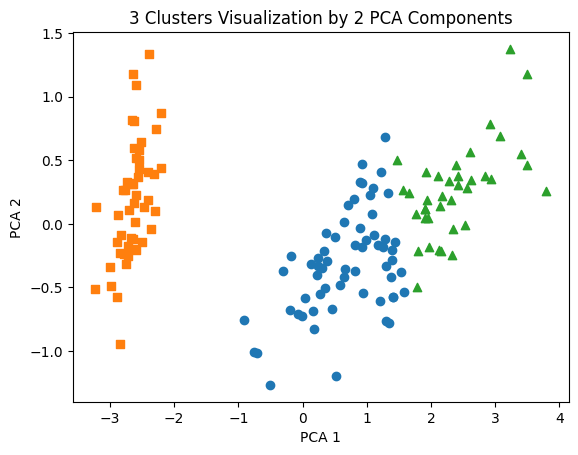

In [28]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


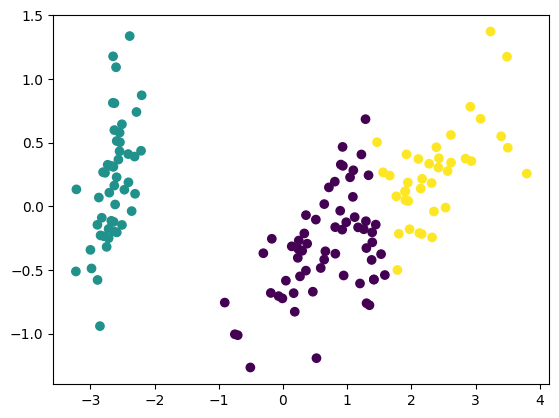

In [31]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

### Clustering 알고리즘 테스트를 위한 데이터 생성 
- "make_blobs" 함수를 사용하는 목적은 임의의 클러스터 데이터셋을 생성하여 클러스터링 알고리즘의 동작을 시각화하고 평가하기 위함이다.

* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 2차원 평면 상에 3개의 클러스터를 가진 데이터셋을 생성한다. 이렇게 생성된 데이터셋은 "X"와 "y"에 저장되고, 각각 특성과 타겟 레이블을 가지게 된다.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [33]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

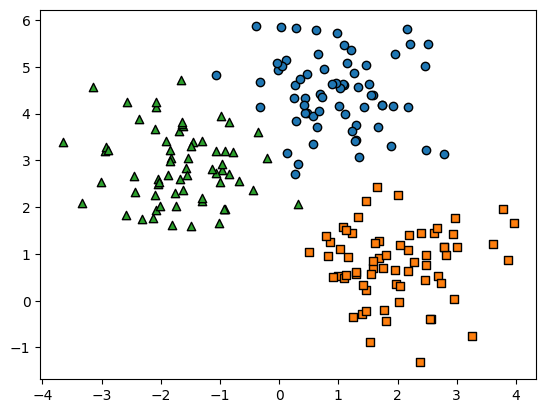

In [34]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

In [35]:
kmeans.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


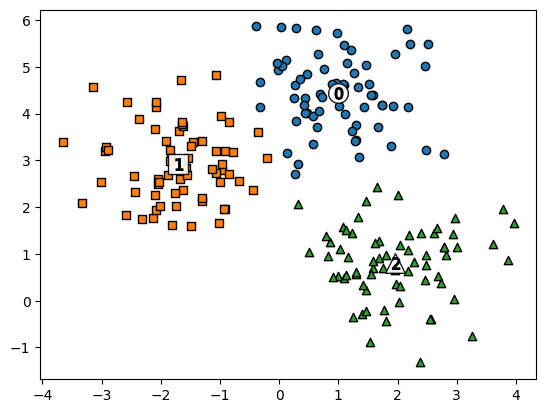

In [36]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    center_x_y = centers[label]
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

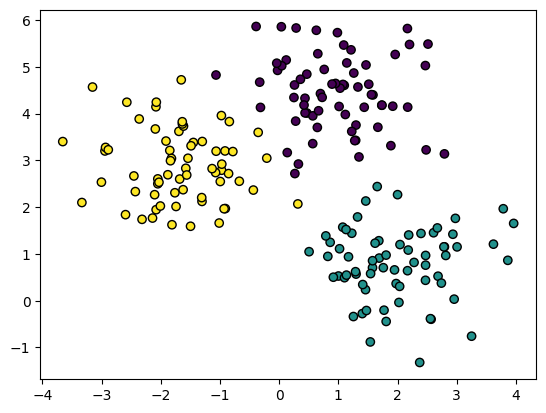

In [37]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

In [38]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [39]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
